___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

## Perform standard imports and load datasets
For this exercise we'll look at monthly U.S. population estimates in thousands from January 2011 to December 2018 (96 records, 8 years of data). Population includes resident population plus armed forces overseas. The monthly estimate is the average of estimates for the first of the month and the first of the following month.
Source: https://fred.stlouisfed.org/series/POPTHM

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.stattools import acf, pacf

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Load the U.S. Population dataset
df = pd.read_csv('/kaggle/input/usdata/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [2]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [5]:
series = pd.Series(df['PopEst'])


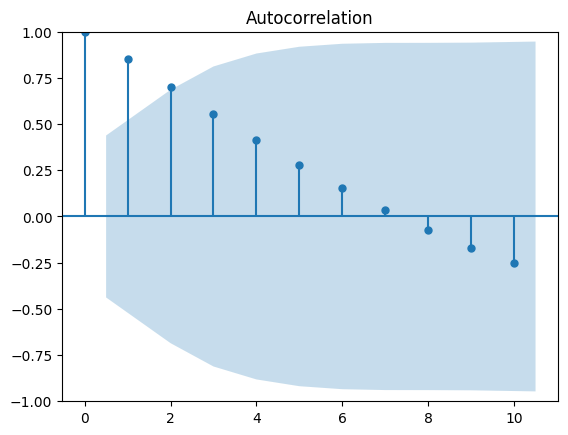

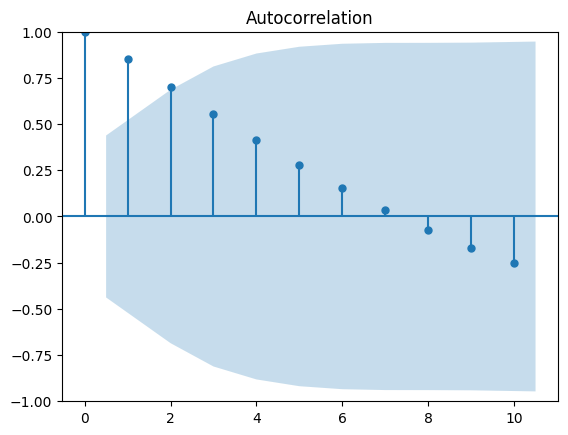

In [11]:
acf_vals = acf(series)


sm.graphics.tsa.plot_acf(acf_vals,lags=10)

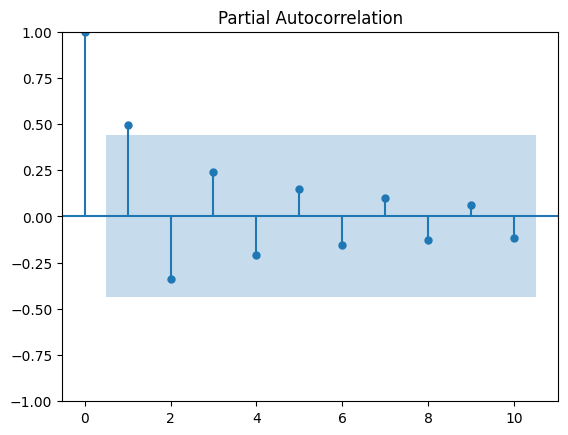

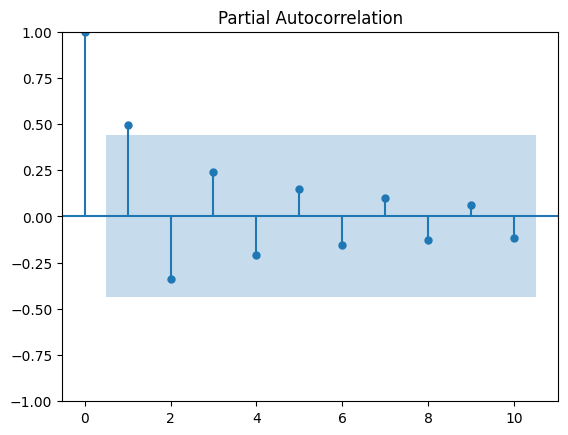

In [12]:
pacf_vals = pacf(series)
sm.graphics.tsa.plot_pacf(pacf_vals)

## Plot the source data

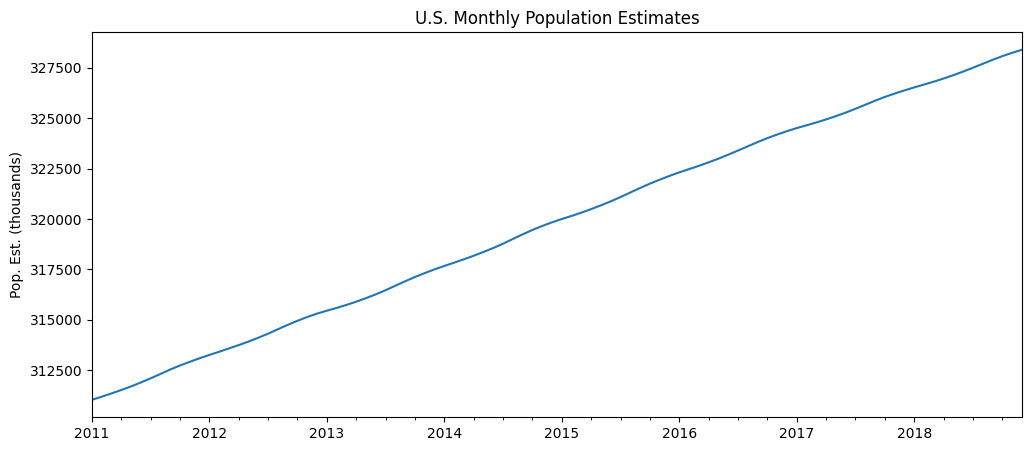

In [13]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

<div class="alert alert-info"><strong>NOTE: </strong>For many training and testing applications we would use the <tt>train_test_split()</tt> function available from Python's <a href='https://scikit-learn.org/stable/'>scikit-learn</a> library. This won't work here as <tt>train_test_split()</tt> takes <em>random samples</em> of data from the population.</div>

In [4]:
len(df)

96

In [5]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

## Fit an AR(1) Model

In [6]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
train['PopEst']

DATE
2011-01-01    311037
2011-02-01    311189
2011-03-01    311351
2011-04-01    311522
2011-05-01    311699
               ...  
2017-08-01    325667
2017-09-01    325866
2017-10-01    326054
2017-11-01    326222
2017-12-01    326378
Freq: MS, Name: PopEst, Length: 84, dtype: int64

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,0,0))

In [21]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -562.024
Date:                Tue, 11 Jun 2024   AIC                           1130.048
Time:                        11:38:43   BIC                           1137.340
Sample:                    01-01-2011   HQIC                          1132.979
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.187e+05   7616.106     41.851      0.000    3.04e+05    3.34e+05
ar.L1          0.9997      0.005    213.450      0.000       0.991       1.009
sigma2      3.473e+04      3e+04      1.159      0.2

<div class="alert alert-info"><strong>NOTE: </strong>There's a slight difference between the object returned by the Holt-Winters Exponential Smoothing <tt>.fit()</tt> method and that returned by AR. The Holt-Winters object uses <tt>.forecast()</tt> for predicted values, while AR uses <tt>.predict()</tt>.</div>

In [22]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [23]:
predictions1

2018-01-01    326375.706240
2018-02-01    326373.413168
2018-03-01    326371.120785
2018-04-01    326368.829090
2018-05-01    326366.538084
2018-06-01    326364.247766
2018-07-01    326361.958135
2018-08-01    326359.669192
2018-09-01    326357.380936
2018-10-01    326355.093368
2018-11-01    326352.806486
2018-12-01    326350.520292
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [24]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326375.7062, expected=326527
predicted=326373.4132, expected=326669
predicted=326371.1208, expected=326812
predicted=326368.8291, expected=326968
predicted=326366.5381, expected=327134
predicted=326364.2478, expected=327312
predicted=326361.9581, expected=327502
predicted=326359.6692, expected=327698
predicted=326357.3809, expected=327893
predicted=326355.0934, expected=328077
predicted=326352.8065, expected=328241
predicted=326350.5203, expected=328393


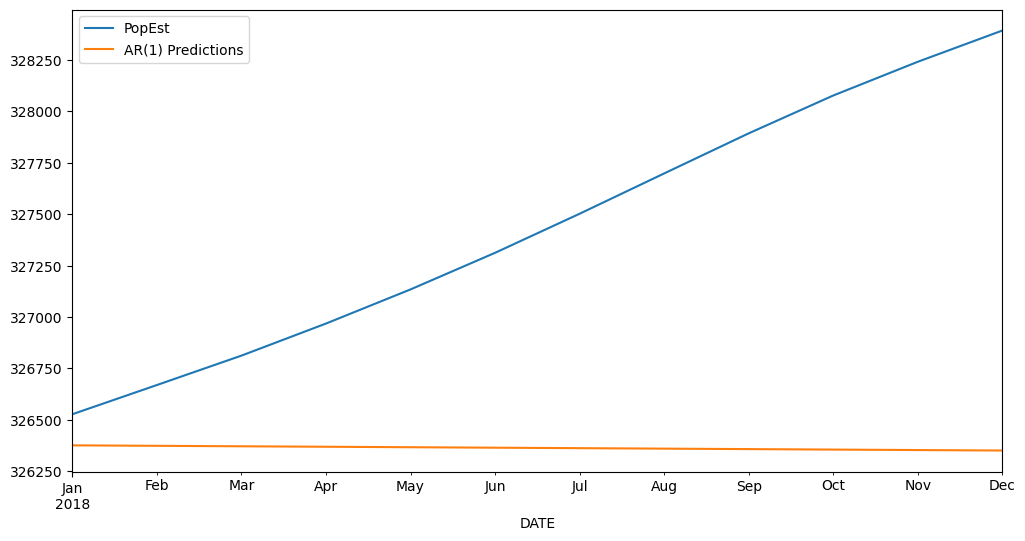

In [25]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Fit an AR(2) Model

In [35]:
# Recall that our model was already created above based on the training set
model = ARIMA(train, order=(2,0,0))
AR2fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -562.024
Date:                Tue, 11 Jun 2024   AIC                           1130.048
Time:                        11:45:32   BIC                           1137.340
Sample:                    01-01-2011   HQIC                          1132.979
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.187e+05   7616.106     41.851      0.000    3.04e+05    3.34e+05
ar.L1          0.9997      0.005    213.450      0.000       0.991       1.009
sigma2      3.473e+04      3e+04      1.159      0.2

In [36]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

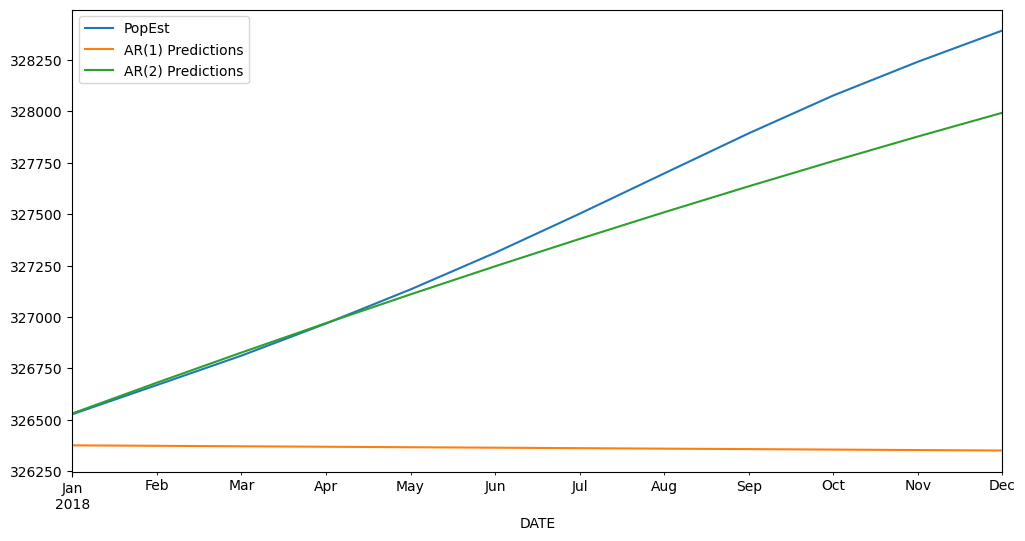

In [37]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [41]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)']
preds = [predictions1, predictions2]  # these are variables, not strings!

for i in range(2):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error:  1525148.75
AR(2) Error: 42992.51688


We see right away how well AR(11) outperformed the other two models.

Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

In [42]:
modls = [AR1fit,AR2fit]

for i in range(2):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 1130.0
AR(2) AIC: 689.29


## Forecasting
Now we're ready to train our best model on the greatest amount of data, and fit it to future dates.

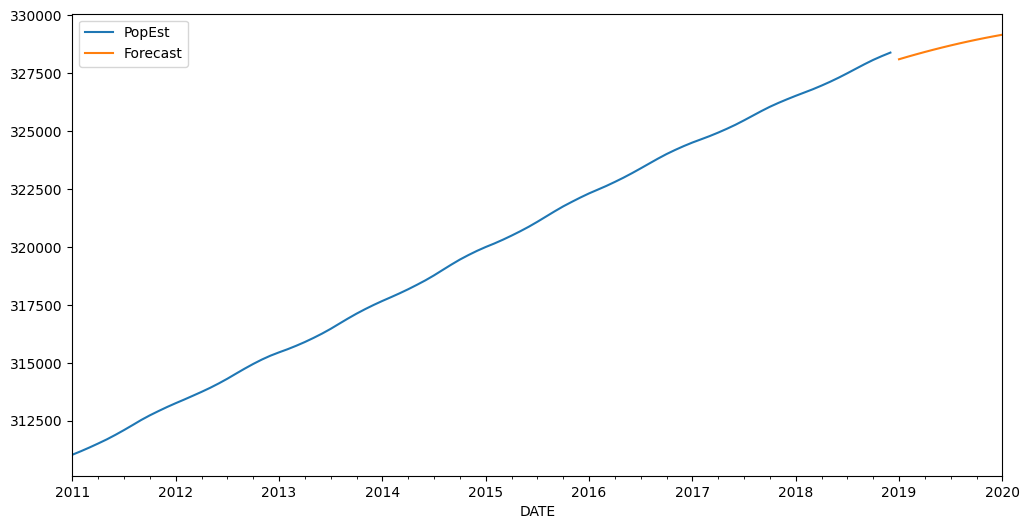

In [44]:

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

## Great job!